# Ensemble Technique Project: Travel Package Purchase Prediction

## Problem Statement

### Context

The policymaker of a tourism company named "Visit with us" wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, and King. Looking at the data of the last year, it was observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is a package that allows the traveler to maintain, enhance, or kick-start a healthy lifestyle, and support or increase one's sense of well-being. For the launch of the new package, the company wants to harness the available data of existing and potential customers to target the right customers.

### Objective

You as a Data Scientist at "Visit with us" travel company has to analyze the customer data and information to provide recommendations to the policymaker and build a model to predict the chances of a potential customer purchasing the newly introduced travel package before the customer is contacted.

### Data Dictionary

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in. 
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

## Loading the dataset

In [2]:
data = pd.read_excel("Tourism.xlsx", sheet_name='Tourism')

In [3]:
df = data.copy()

## Data Overview

### View the first couple of rows in the dataset

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### Understand the shape

In [6]:
df.shape

(4888, 20)

* This dataset contains 4888 rows and 20 columns

### Check the data types of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* The columns consist of integers and string values

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


* The `DurationOfPitch` has a max value of 127 while the 75th percentile is 20 which indicates outliers
* The `Age` of customers ranges between 18 and 61
* The `NumberOfTrips` has a max value of 22 while the 75th percentile is 4 which indicates potential outliers in the data
* The `MonthlyIncome` of customers has a max value of 98,678 while the 75th percentile is around 25,571 which is another indicator of potential outliers in the data

### Check for missing values

In [9]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* There's about 8 columns that contain missing values in the dataset

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?
2. Which travel package is pitched the most by the salespersons to the customers?
3. How are the different customer attributes correlated to each other?
4. How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?
5. How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [13]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### What is the distribution of the monthly income of customers? Are there any noticeable patterns or outliers in the distribution?

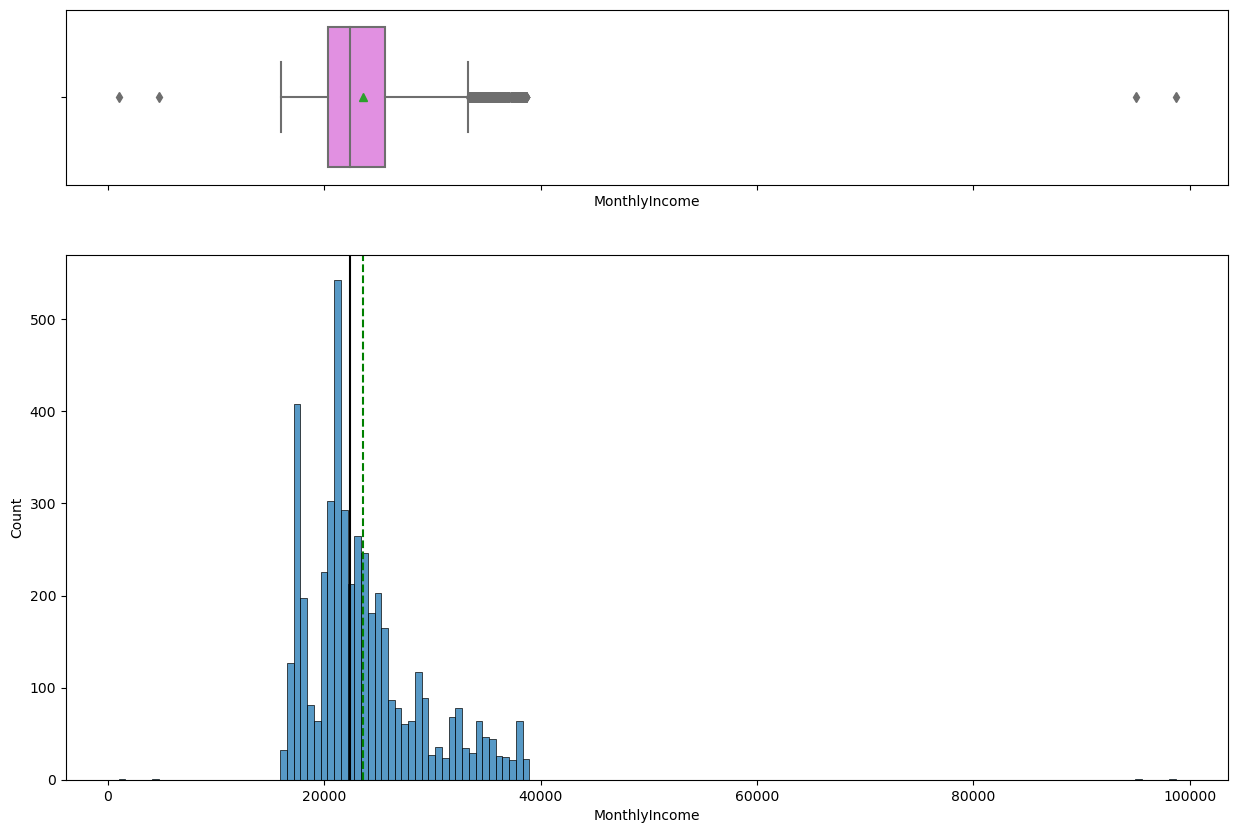

In [14]:
histogram_boxplot(df, 'MonthlyIncome');

* The distribution of monthly income of customers is right skewed
* There are also a few outliers in the data
* We should run a log transformation on this column to remove the skewness

In [15]:
df['MonthlyIncome'].fillna(df.MonthlyIncome.mean(), inplace=True)

### Which travel package is pitched the most by the salespersons to the customers?

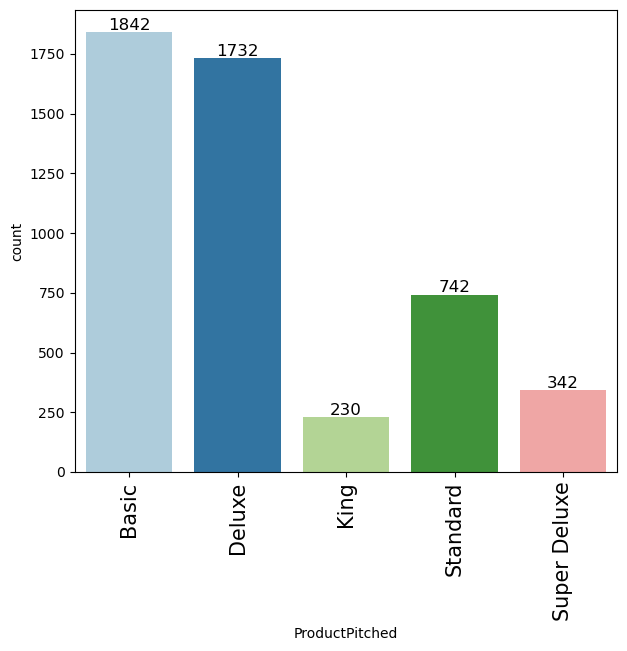

In [16]:
labeled_barplot(df, 'ProductPitched')

* The basic package is the most pitched package by salespersons with the deluxe package following close behind

ProductPitched  Basic  Deluxe  King  Standard  Super Deluxe   All
ProdTaken                                                        
All              1842    1732   230       742           342  4888
0                1290    1528   210       618           322  3968
1                 552     204    20       124            20   920
------------------------------------------------------------------------------------------------------------------------


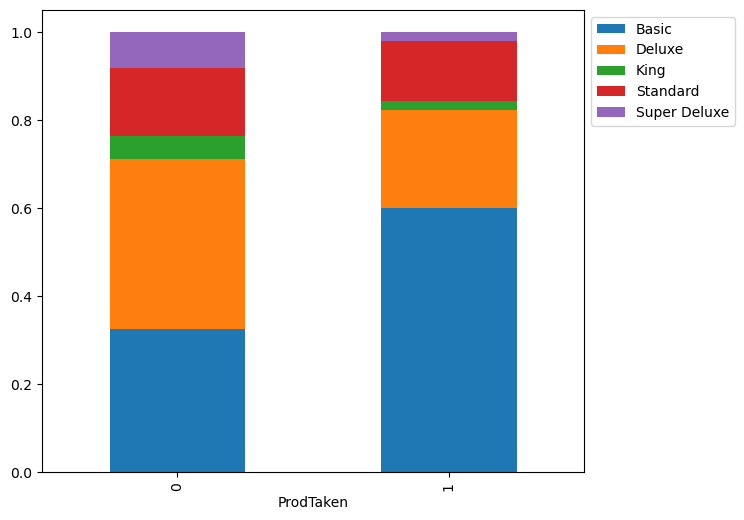

In [17]:
stacked_barplot(df, 'ProdTaken', 'ProductPitched')

* The three top packages purchased by customers are the basic, deluxe, and standard packages
* The basic package is the most bought package by customers last year
* 920 customer purchased packages last year while 3968 customer did not. 

### How are the different customer attributes correlated to each other?

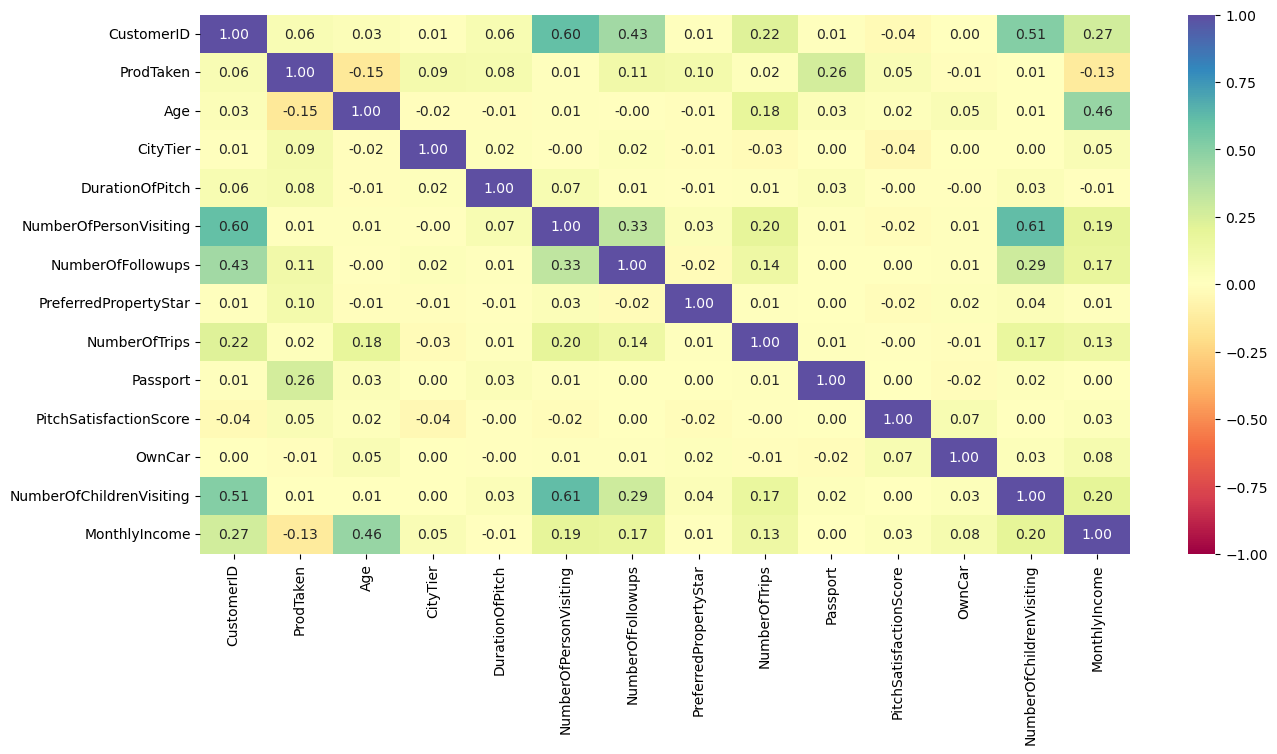

In [18]:
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(15,7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* MonthlyIncome shows average correlation with Age
* NumberOfChildrenVisiting shares strong correlation with NumberOfPersonVisiting
* NumberOfFollowups shows average correlation with NumberOfPersonVisiting and NumberOfChildrenVisiting
* ProdTaken shares average correlation with Passport
* NumberOfTrips shows below average correlation with Age, NumberOfPersonVisiting, NumberOfFollowups, and NumberOfChildrenVisiting

### How does a customer's interest in purchasing the newly introduced travel package vary with their occupation?

Occupation  Free Lancer  Large Business  Salaried  Small Business   All
ProdTaken                                                              
1                     2             120       414             384   920
All                   2             434      2368            2084  4888
0                     0             314      1954            1700  3968
------------------------------------------------------------------------------------------------------------------------


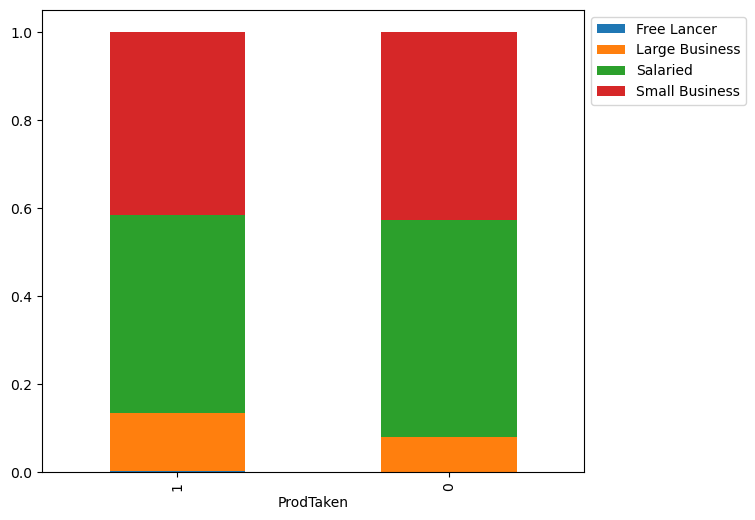

In [19]:
stacked_barplot(df, 'ProdTaken', 'Occupation')

* Customer's interest in purchasing the newly introduced package varies significantly with their occupation
* Most our customers are either salaried employees or a small business. 
* Salaried and Small Business customers showed the most interest in purchasing packages in the previous year. 

### How does a customer's interest in purchasing the newly introduced travel package vary with their marital status?

MaritalStatus  Divorced  Married  Single  Unmarried   All
ProdTaken                                                
All                 950     2340     916        682  4888
0                   826     2014     612        516  3968
1                   124      326     304        166   920
------------------------------------------------------------------------------------------------------------------------


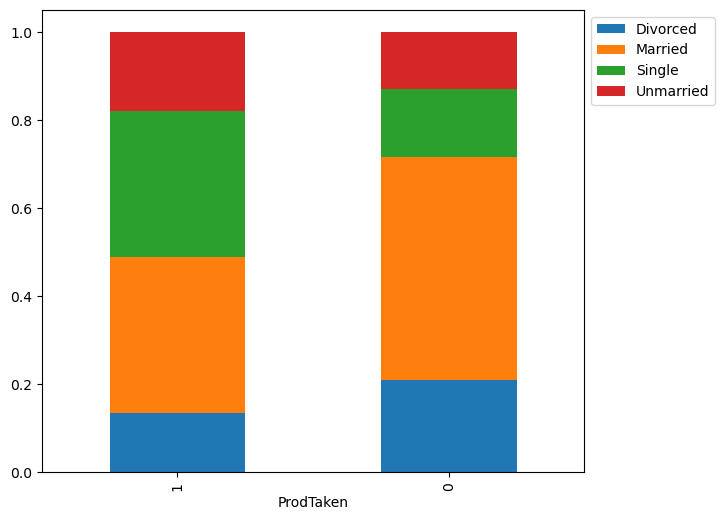

In [20]:
stacked_barplot(df, 'ProdTaken', 'MaritalStatus')

* Most of our customers are married and married customers are most interested in packages, although married customers take up about 47% of the data.
* Single customers also show a good amount of interest in purchasing newly introduced packages and single customers make up 18% of the data.
* In the data we have customers that are both single and unmarried, these values appear synonymous 

### What are the preferred hotel property ratings by customers that purchase packages?

PreferredPropertyStar   3.0  4.0  5.0   All
ProdTaken                                  
All                    2993  913  956  4862
0                      2511  731  706  3948
1                       482  182  250   914
------------------------------------------------------------------------------------------------------------------------


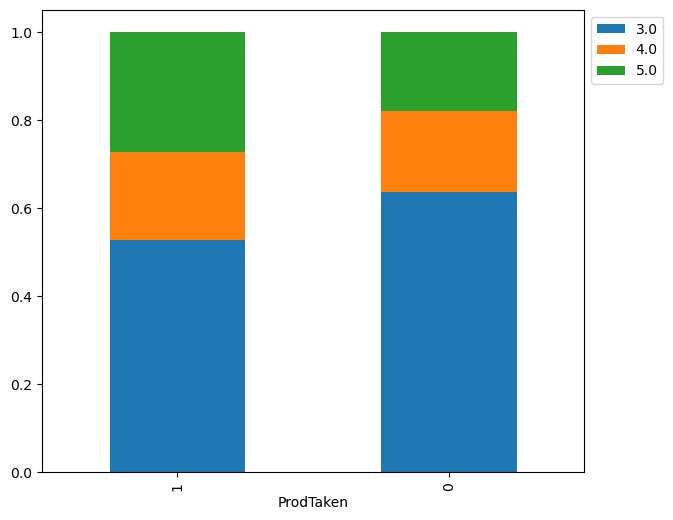

In [21]:
stacked_barplot(df, 'ProdTaken', 'PreferredPropertyStar')

* Most customers that purchase products prefer a 3 star hotel rating with 5 star rated hotels following behind

### How many people typically plan to take a trip with a customer?

NumberOfPersonVisiting   1     2     3     4  5   All
ProdTaken                                            
0                       39  1151  1942   833  3  3968
All                     39  1418  2402  1026  3  4888
1                        0   267   460   193  0   920
------------------------------------------------------------------------------------------------------------------------


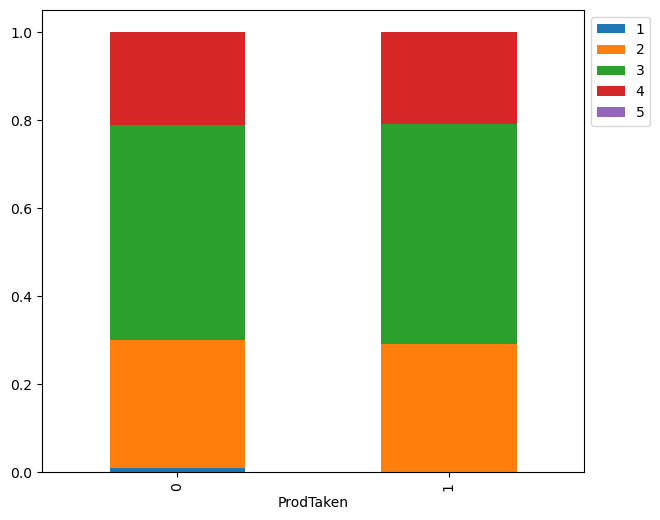

In [22]:
stacked_barplot(df, 'ProdTaken', 'NumberOfPersonVisiting')

* Customers that typically take trips have about 2-4 people that are planning to go with them

### How many children typically take trips with a customer?

NumberOfChildrenVisiting   0.0   1.0   2.0  3.0   All
ProdTaken                                            
All                       1082  2080  1335  325  4822
0                          880  1688  1082  259  3909
1                          202   392   253   66   913
------------------------------------------------------------------------------------------------------------------------


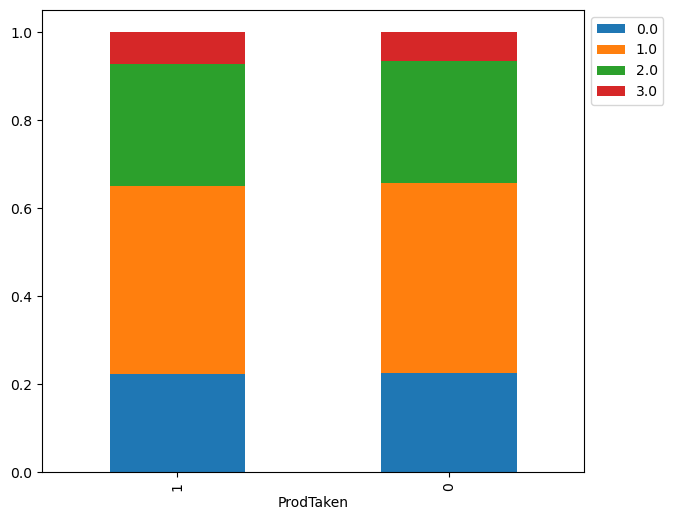

In [23]:
stacked_barplot(df, 'ProdTaken', 'NumberOfChildrenVisiting')

* Most customers planning to take a trip typically take about 1 child with them on trips

### Observations on DurationOfPitch

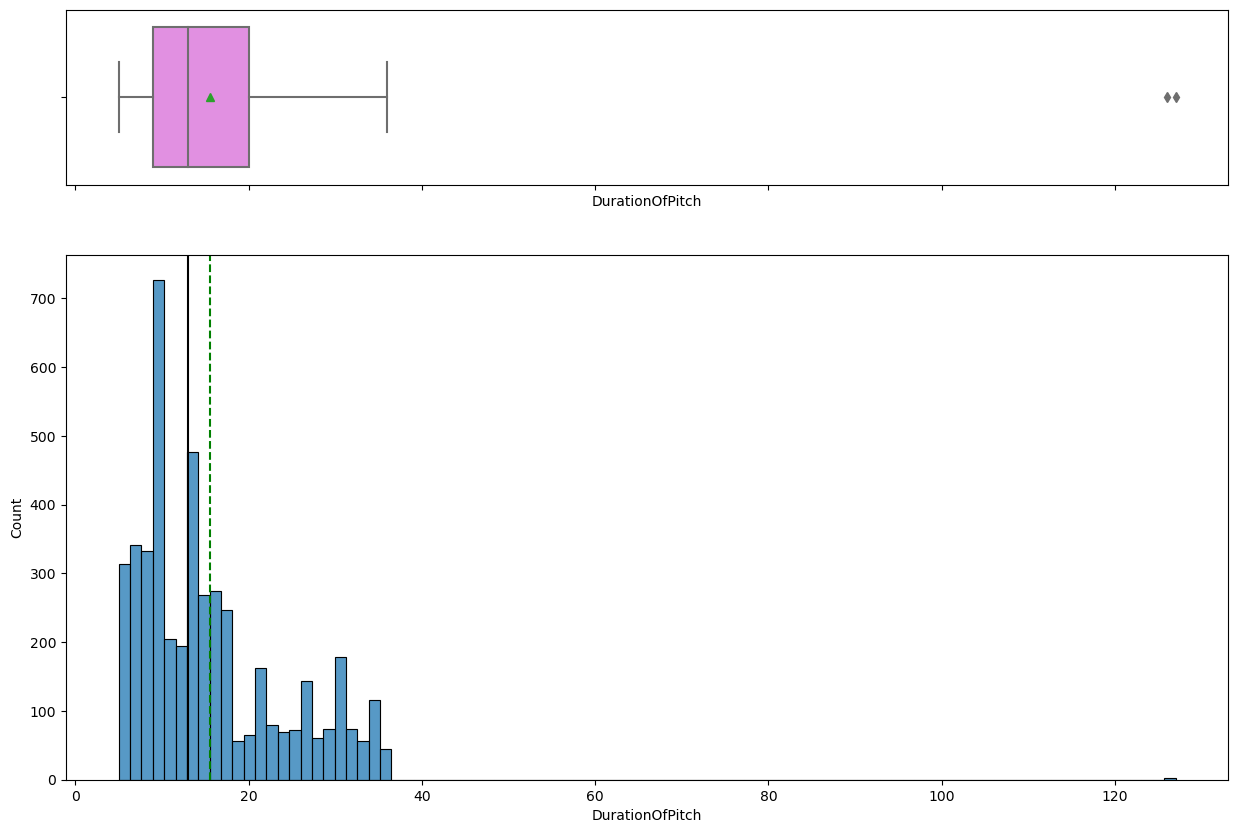

In [24]:
histogram_boxplot(df, 'DurationOfPitch');

* The distribution in the data is right skewed
* There's just a few outliers in the data
* We should run a log transformation on this column to reduce the skewness

In [25]:
df['DurationOfPitch'].fillna(df.DurationOfPitch.mean(), inplace=True)

### Perform Log Transformations on the DurationOfPitch column

In [26]:
df['DurationOfPitchLog'] = np.log(data['DurationOfPitch'])

In [27]:
df.drop(["DurationOfPitch"], axis=1, inplace=True)

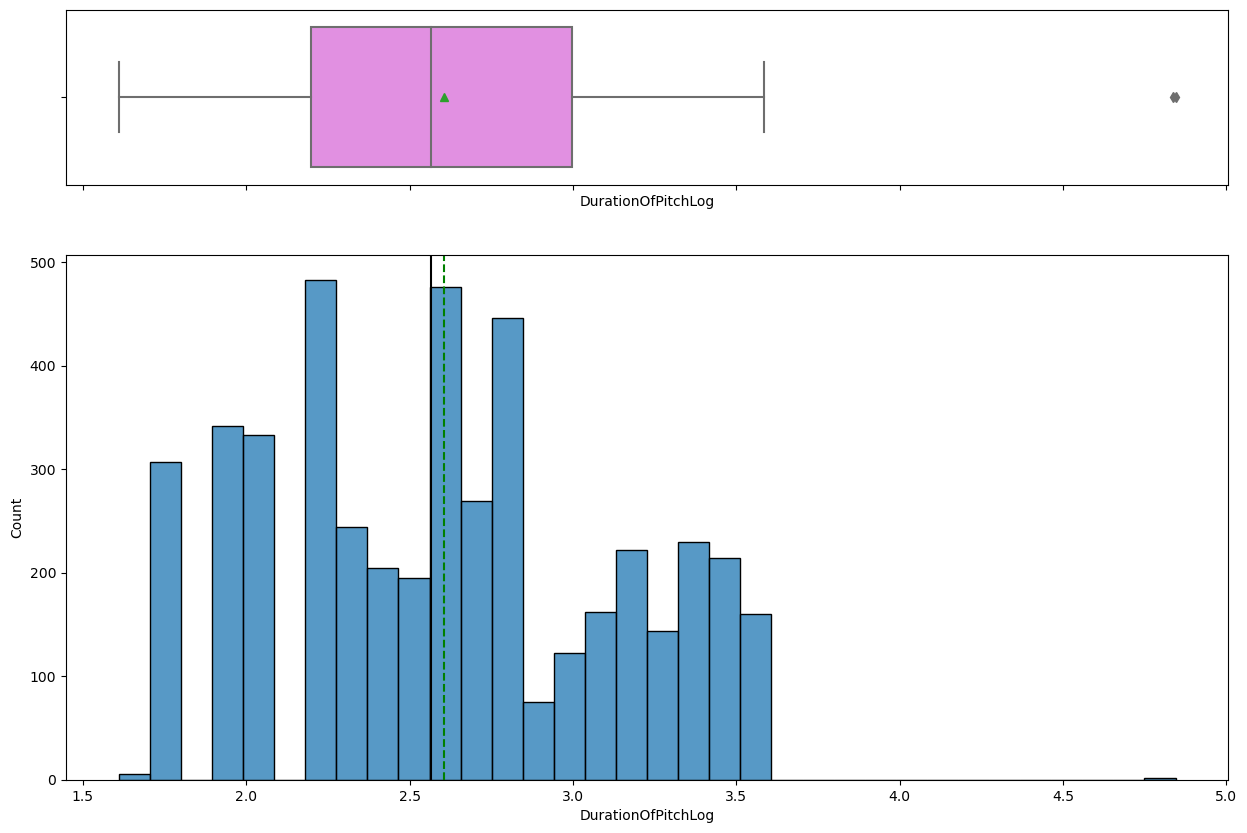

In [28]:
histogram_boxplot(df, 'DurationOfPitchLog');

* After running the log transformation this column appears to be somewhat normally distributed

### Perform Log Transformations on the MonthlyIncome column

In [29]:
df['MonthlyIncomeLog'] = np.log(data['MonthlyIncome'])

In [30]:
df.drop(["MonthlyIncome"], axis=1, inplace=True)

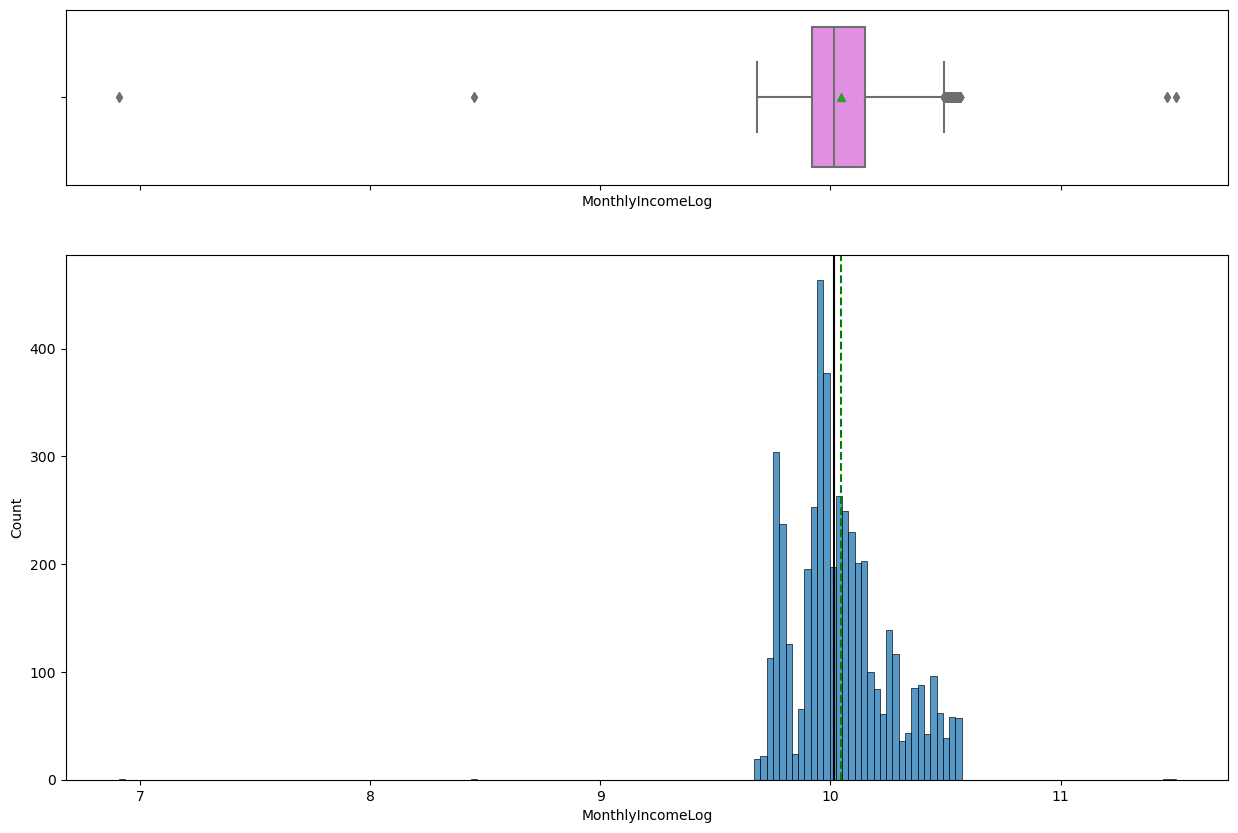

In [31]:
histogram_boxplot(df, 'MonthlyIncomeLog');

* The distribution for MonthlyIncomeLog is still slightly skewed to the right but its significantly less than before after running the log transformation

### Observation on NumberOfTrips

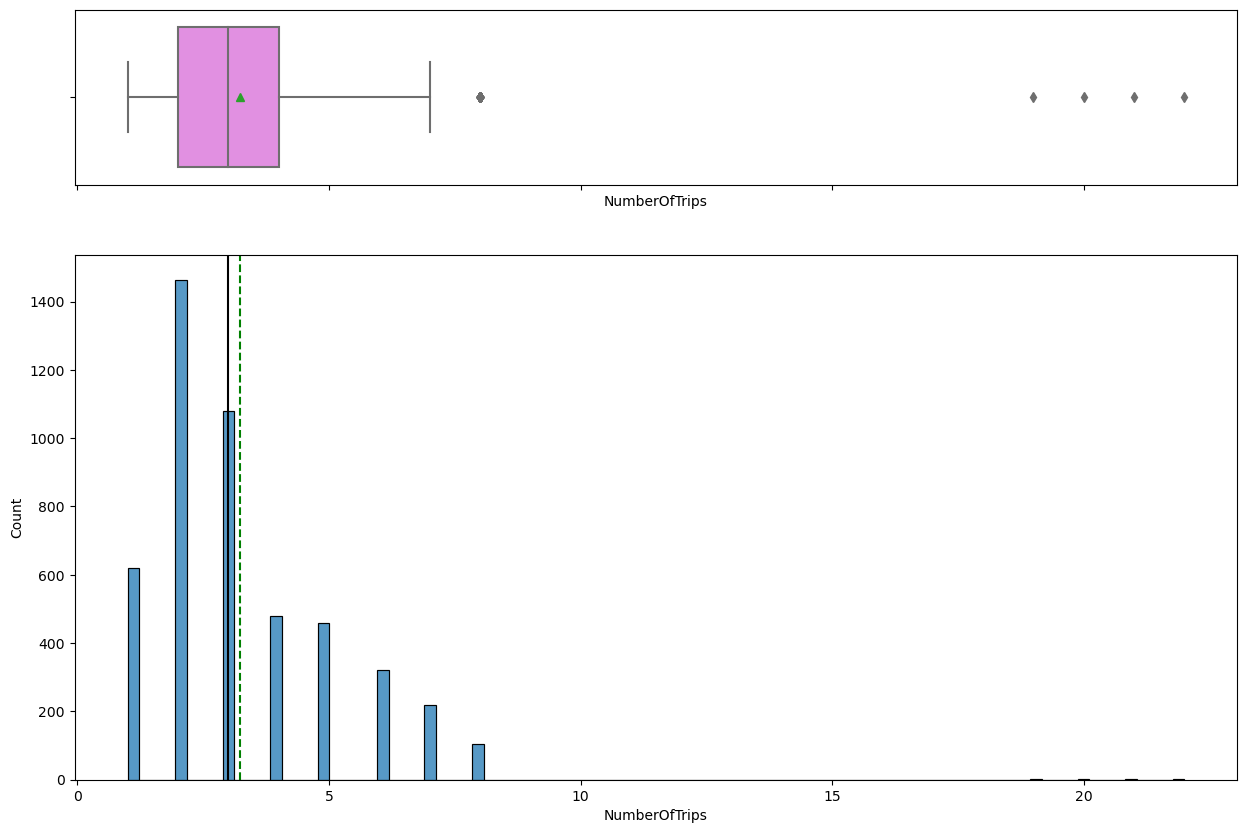

In [32]:
histogram_boxplot(df, 'NumberOfTrips');

* The distribution is slightly right skewed
* There is also a few outliers

### Missing Value Treatment

In [33]:
df["Age"].fillna(df.Age.mean(), inplace=True)

In [34]:
df['NumberOfFollowups'].fillna(df.NumberOfFollowups.mean(), inplace=True)

In [35]:
df['PreferredPropertyStar'].fillna(df.PreferredPropertyStar.mean(), inplace=True)

In [36]:
df['NumberOfTrips'].fillna(df.NumberOfTrips.mean(), inplace=True)

In [37]:
df['NumberOfChildrenVisiting'].fillna(df.NumberOfChildrenVisiting.mean(), inplace=True)

In [38]:
mode_values = df['TypeofContact'].mode().iloc[0]

In [39]:
df['TypeofContact'].fillna(mode_values, inplace=True)

In [40]:
df['MonthlyIncomeLog'].fillna(df.MonthlyIncomeLog.mean(), inplace=True)

In [41]:
df['DurationOfPitchLog'].fillna(df.DurationOfPitchLog.mean(), inplace=True)

In [42]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
DurationOfPitchLog          0
MonthlyIncomeLog            0
dtype: int64

* All missing values have been treated!

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4888 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

### Let's convert object data types to categorical

In [44]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,DurationOfPitchLog,MonthlyIncomeLog
0,200000,1,41.000000,Self Enquiry,3,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,1.791759,9.951944
1,200001,0,49.000000,Company Invited,1,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,2.639057,9.909967
2,200002,1,37.000000,Self Enquiry,1,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,2.079442,9.746249
3,200003,0,33.000000,Company Invited,1,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,2.197225,9.793059
4,200004,0,37.622265,Self Enquiry,1,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,2.079442,9.823795
5,200005,0,32.000000,Company Invited,1,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,2.079442,9.801898
6,200006,0,59.000000,Self Enquiry,1,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,2.197225,9.779624
7,200007,0,30.000000,Self Enquiry,1,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,3.401197,9.780924
8,200008,0,38.000000,Company Invited,1,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,3.367296,10.107489
9,200009,0,36.000000,Self Enquiry,1,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,3.496508,9.915268


In [45]:
oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched", "MaritalStatus", "Designation"]

In [46]:
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,CustomerID,ProdTaken,Age,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.000000,3,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,200001,0,49.000000,1,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,200002,1,37.000000,1,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,200003,0,33.000000,1,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
4,200004,0,37.622265,1,2,3.0,4.0,1.0,0,5,...,0,1,0,0,0,0,1,0,0,0
5,200005,0,32.000000,1,3,3.0,3.0,1.0,0,5,...,0,0,0,1,0,0,1,0,0,0
6,200006,0,59.000000,1,2,2.0,5.0,5.0,1,2,...,0,1,0,0,0,0,1,0,0,0
7,200007,0,30.000000,1,3,3.0,3.0,2.0,0,2,...,0,0,1,0,0,0,1,0,0,0
8,200008,0,38.000000,1,2,4.0,3.0,1.0,0,3,...,0,0,0,0,1,0,0,0,1,0
9,200009,0,36.000000,1,3,3.0,3.0,7.0,0,3,...,0,1,0,0,0,0,0,1,0,0


In [47]:
df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:
1. Predicting the chance of a customer will purchase a travel package but in reality, the customer will not. (FP)
2. Predicting the chance of a customer will not purchase a travel package but in reality, the customer will. (FN)

### Which case is more important?
* If we predict the chance of a customer purchasing a tourism package, and they appear uninterested that indicates that we didn't take the time to understand our target customer.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall the higher the chances of minimizing the false negatives.


In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [49]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [50]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [51]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [52]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Split Data

In [53]:
X = df.drop(["ProdTaken", "CustomerID"], axis=1)
y = df['ProdTaken']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

### Model Building: Decision Tree

In [55]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Scoring our Decision Tree

In [56]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964


In [57]:
#Checking number of positives
y.sum(axis = 0)

920

* We're getting a 90% accuracy on the test set here which looks good. 

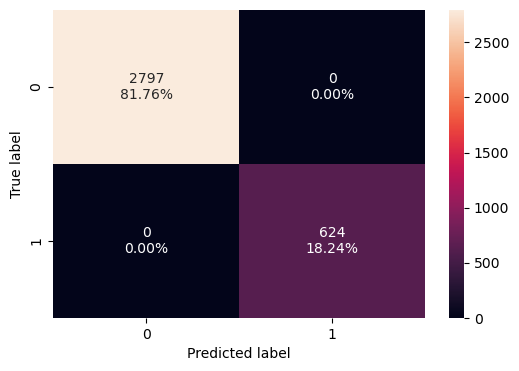

In [58]:
confusion_matrix_sklearn(dTree, X_train, y_train)

In [59]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


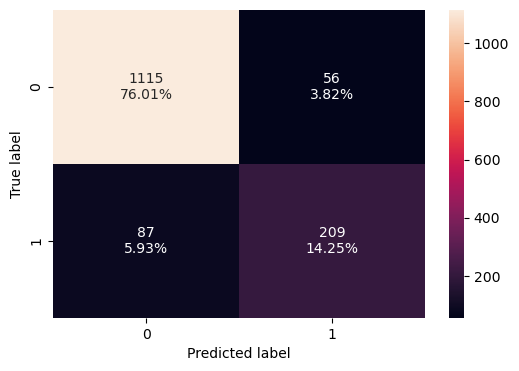

In [60]:
confusion_matrix_sklearn(dTree, X_test, y_test)

In [61]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.902522,0.706081,0.788679,0.745098


* The model appears to be performing decent with just the default parameters, lets see if we can improve this

### Model Improvement: Decision Tree

### Decision Tree Pre-Pruning

In [62]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=50, random_state=1)

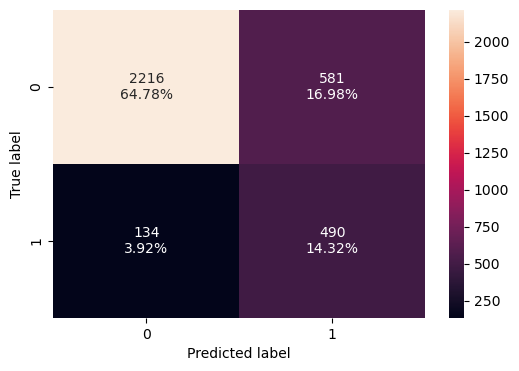

In [63]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [64]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790997,0.785256,0.457516,0.578171


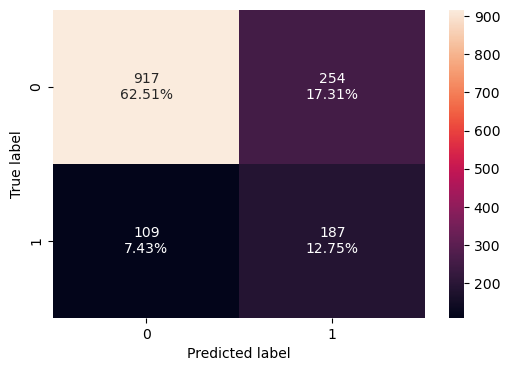

In [65]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [66]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.752556,0.631757,0.424036,0.507463


* This model is unable to generalize well on unseen data

In [67]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

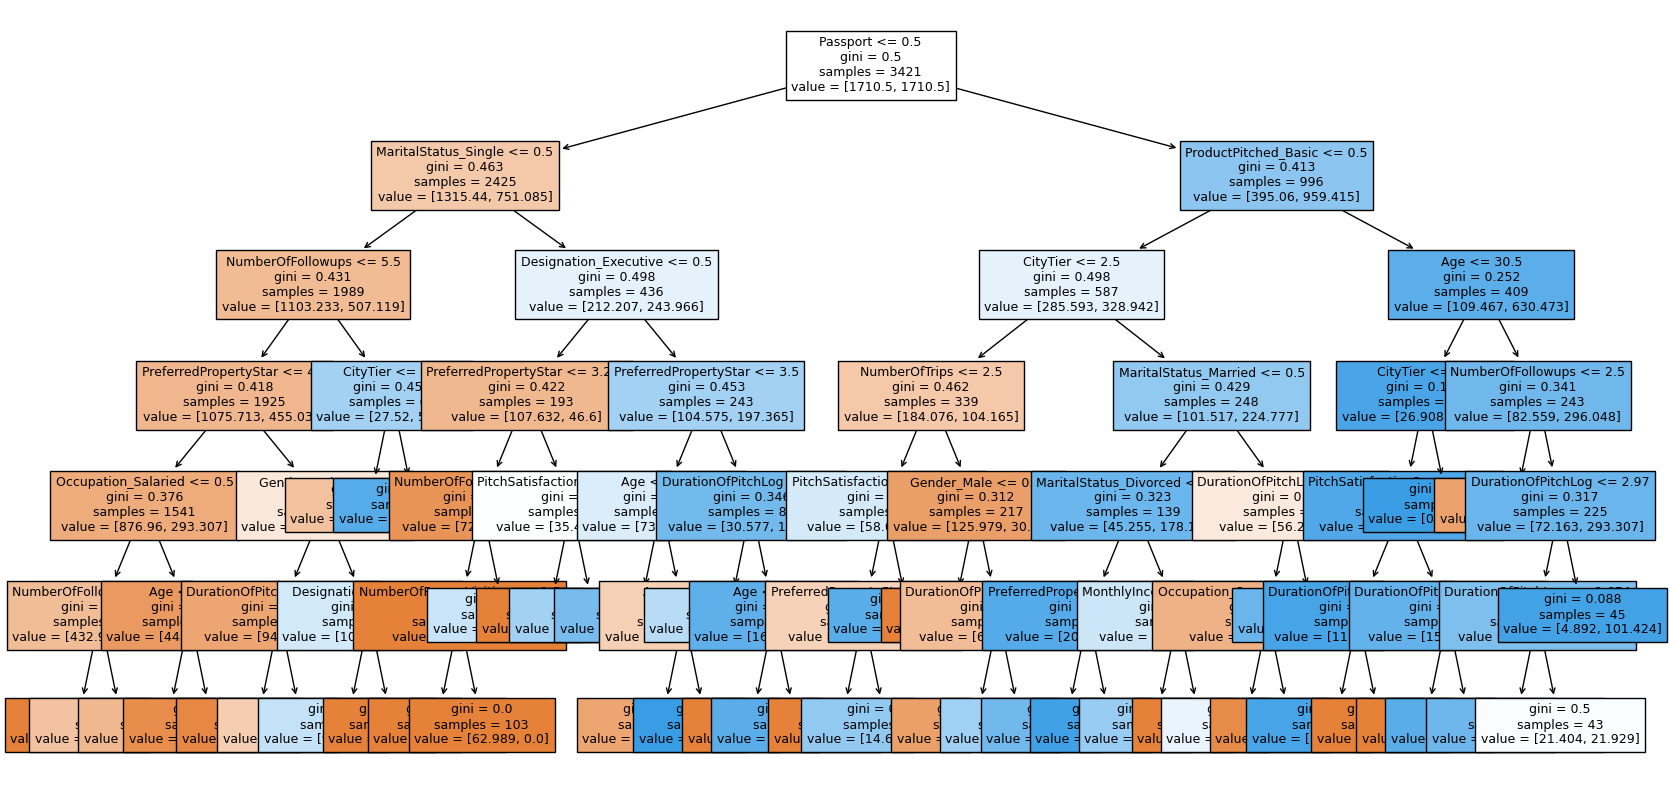

In [68]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [69]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Passport <= 0.50
|   |--- MaritalStatus_Single <= 0.50
|   |   |--- NumberOfFollowups <= 5.50
|   |   |   |--- PreferredPropertyStar <= 4.50
|   |   |   |   |--- Occupation_Salaried <= 0.50
|   |   |   |   |   |--- NumberOfFollowups <= 2.50
|   |   |   |   |   |   |--- weights: [40.36, 0.00] class: 0
|   |   |   |   |   |--- NumberOfFollowups >  2.50
|   |   |   |   |   |   |--- weights: [392.61, 205.59] class: 0
|   |   |   |   |--- Occupation_Salaried >  0.50
|   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |--- weights: [132.71, 57.56] class: 0
|   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |--- weights: [311.28, 30.15] class: 0
|   |   |   |--- PreferredPropertyStar >  4.50
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- DurationOfPitchLog <= 2.59
|   |   |   |   |   |   |--- weights: [54.43, 2.74] class: 0
|   |   |   |   |   |--- DurationOfPitchLog >  2.59
|   |   |   |   |   |   |--- weights: [40.36, 24.67] class: 0
|   |   |   

* If a customer does not have a passport, they're single, the number of follow ups is less than or equal to 5.5, their preferred property star is less than or equal to 4.5, their occupation is not salaried, and the number of followups is less than or equal to 2.5
* If a customer does not have a passport there is a low probability that they'll be pitched a travel package

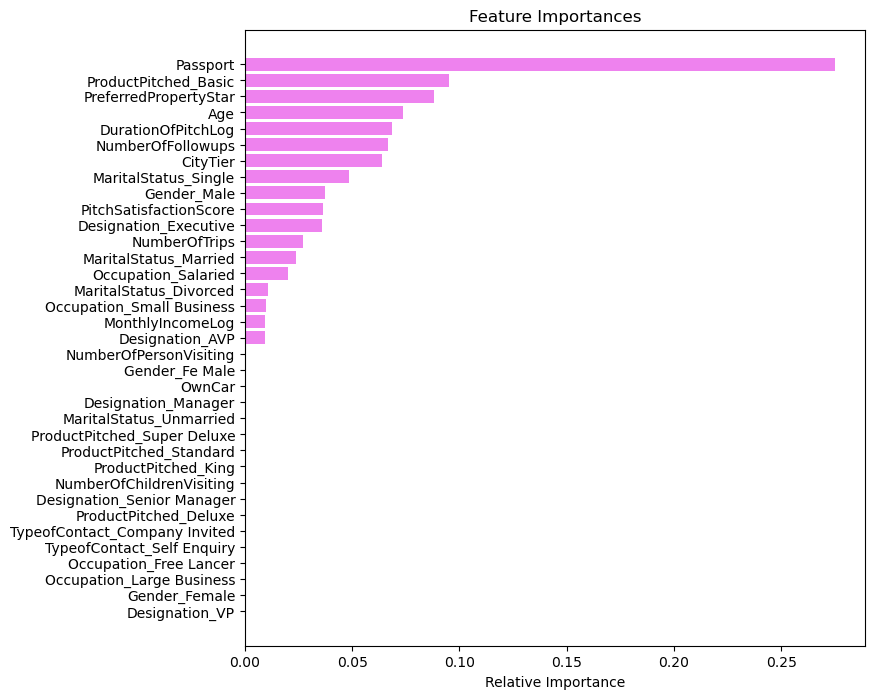

In [70]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre pruned decision tree passport, basic product pitched, and preferred property star are the most important features

### Decision Tree Post Pruning 

In [71]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [72]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-4.938904e-16
1,2.778535e-19,-4.936125e-16
2,2.977001e-19,-4.933148e-16
3,2.977001e-19,-4.930171e-16
4,2.977001e-19,-4.927194e-16
...,...,...
259,7.374511e-03,4.037643e-01
260,9.596448e-03,4.133608e-01
261,1.004909e-02,4.234099e-01
262,1.969656e-02,4.431064e-01


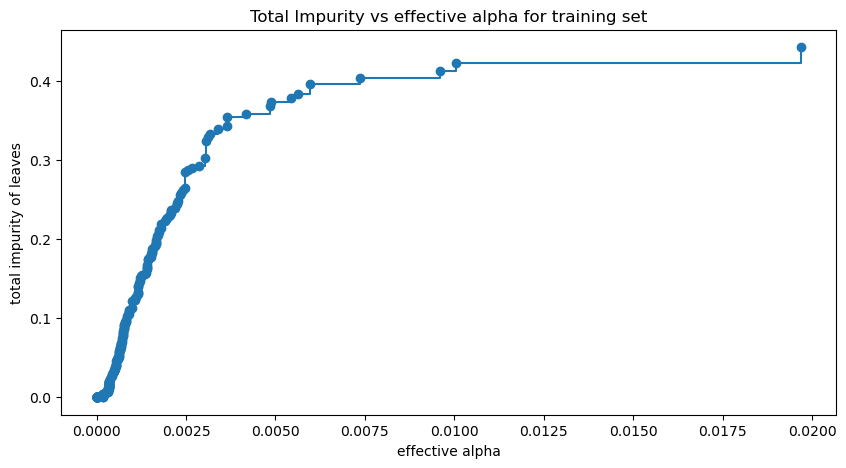

In [73]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0568935570062708


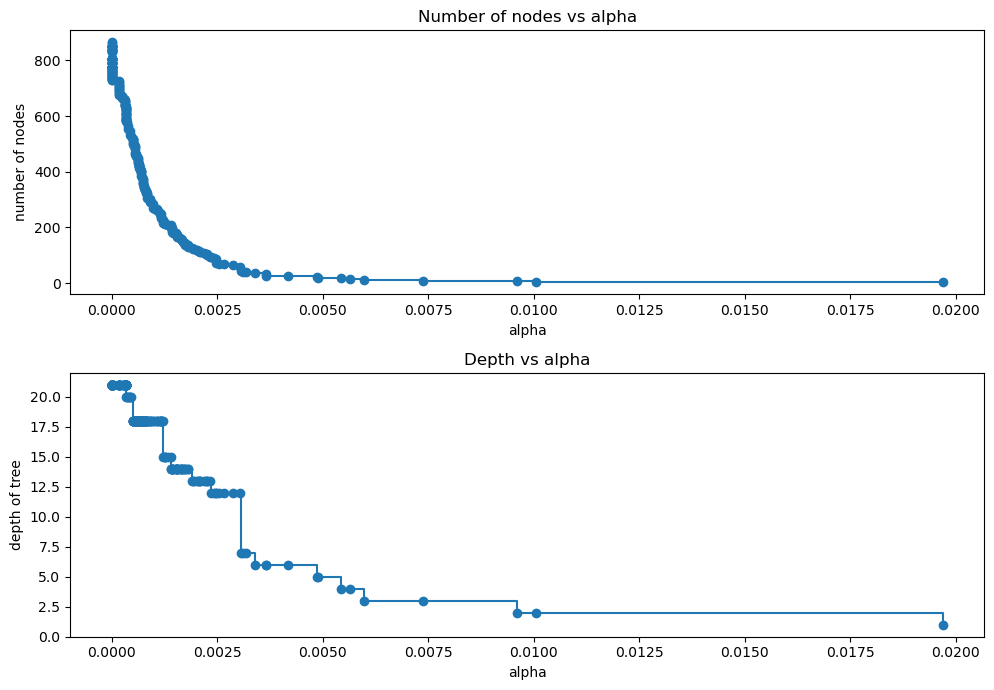

In [75]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [76]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [77]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [78]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

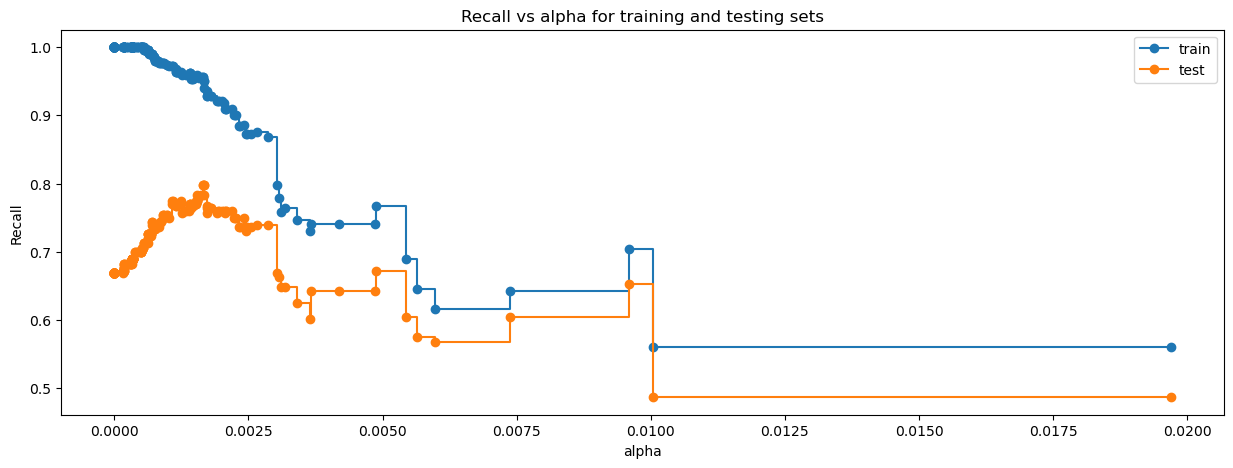

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
# creating the model where we get highest train and test recall
index_post_model = np.argmax(recall_test)
post_model = clfs[index_post_model]
print(post_model)

DecisionTreeClassifier(ccp_alpha=0.0016458970138725608, class_weight='balanced',
                       random_state=1)


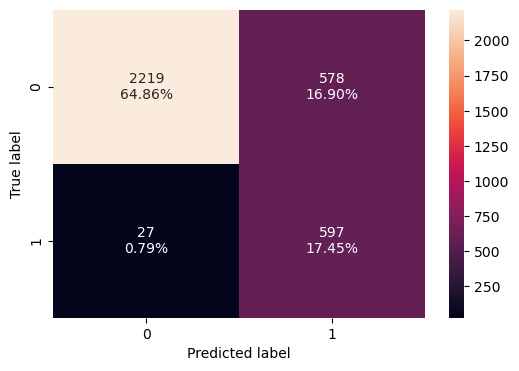

In [81]:
confusion_matrix_sklearn(post_model, X_train, y_train)

In [82]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    post_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.823151,0.956731,0.508085,0.663702


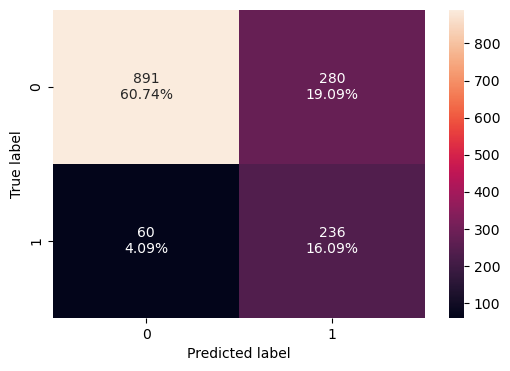

In [83]:
confusion_matrix_sklearn(post_model, X_test, y_test)

In [84]:
decision_tree_post_test = model_performance_classification_sklearn(
    post_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.768234,0.797297,0.457364,0.581281


* The training set is outperforming the test set on recall by a large amount, but overall this model is performing better than the pre-pruning model

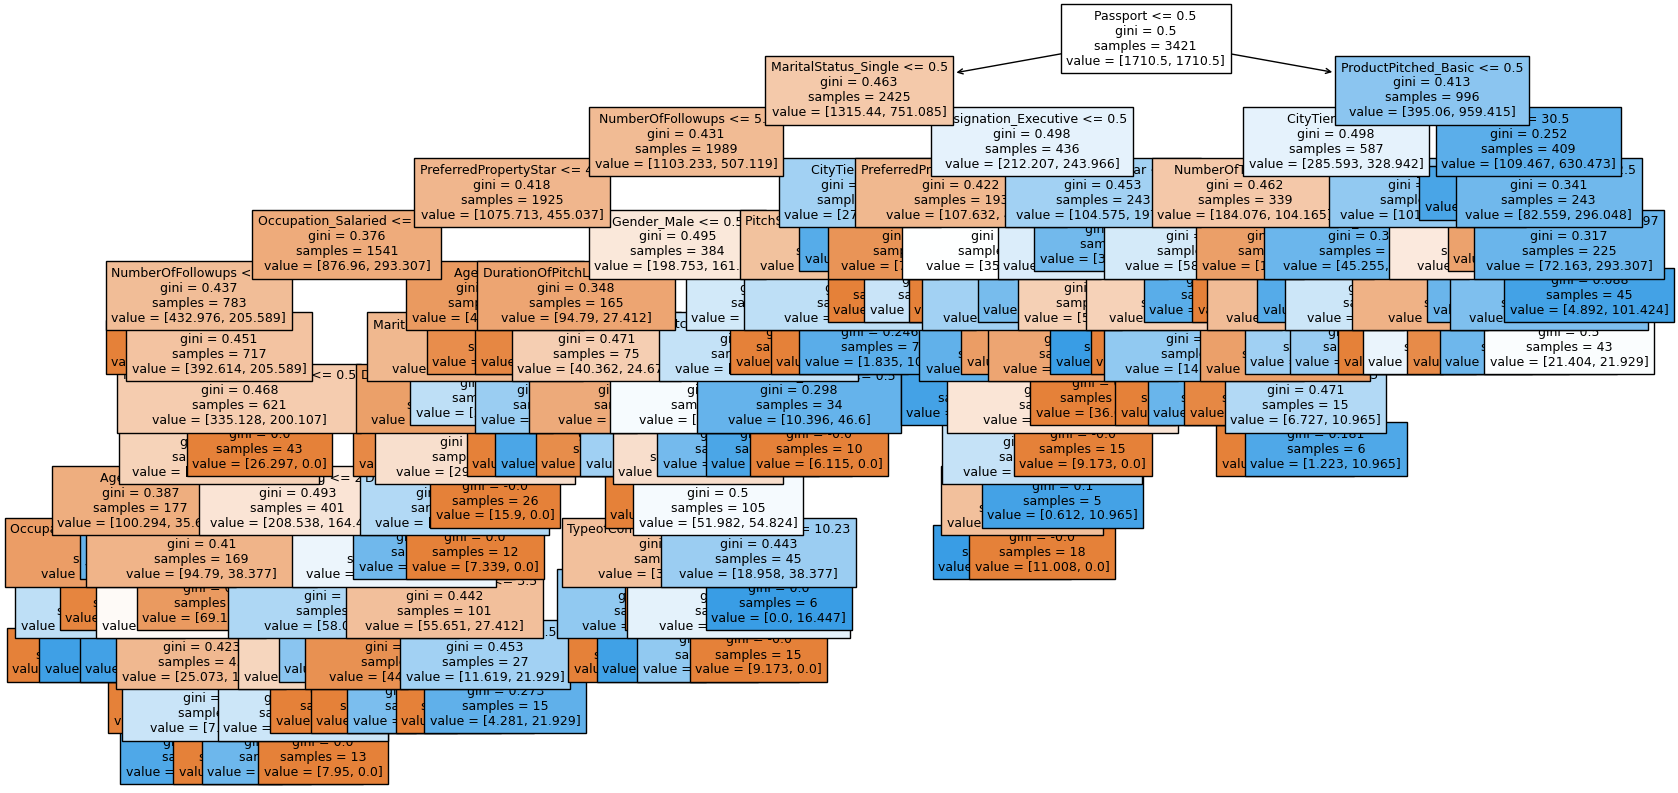

In [85]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    post_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [86]:
importances = post_model.feature_importances_
indices = np.argsort(importances)

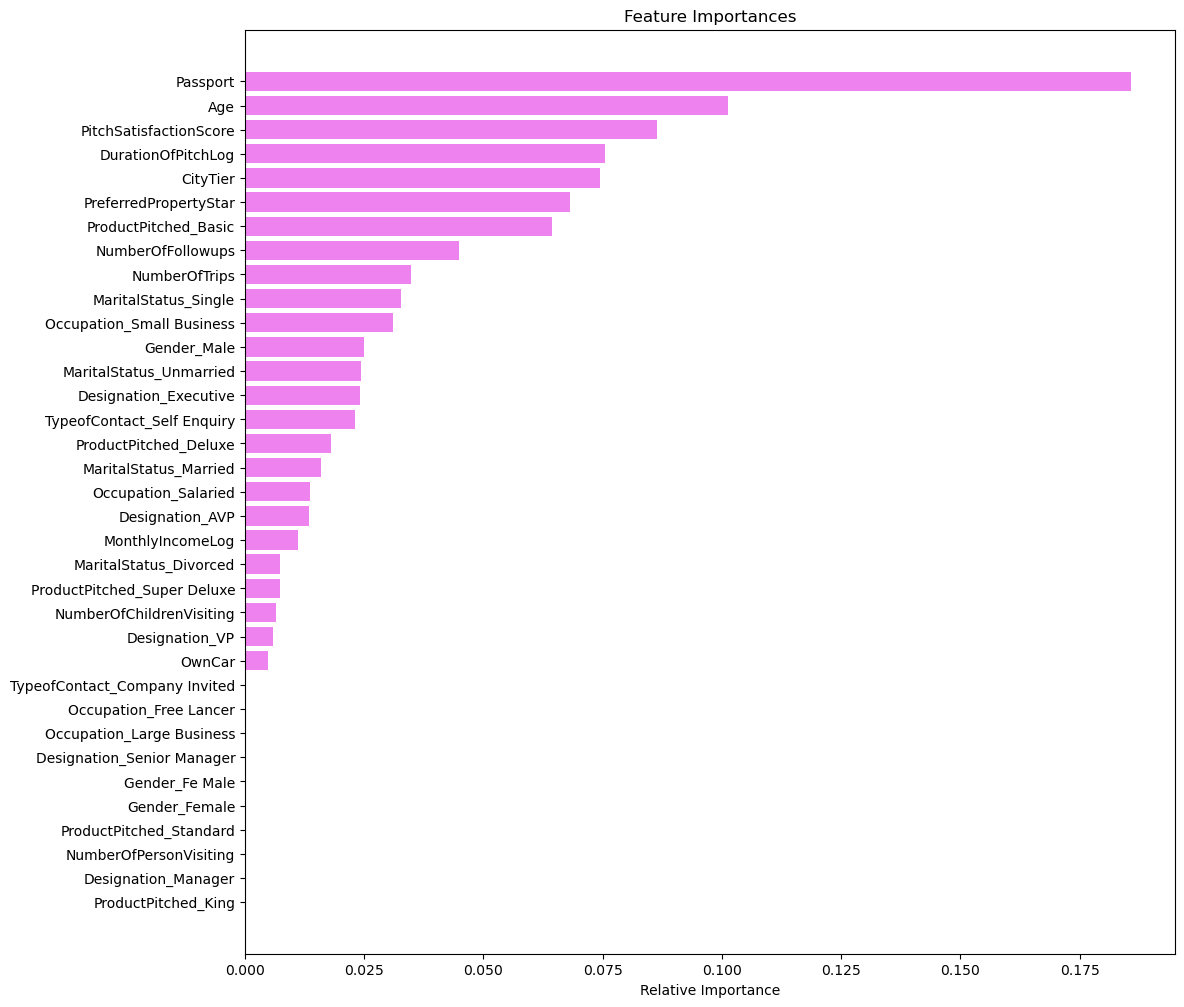

In [87]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Passport, Age, and PitchSatisfactionScore are the most important features in post pruned tree

### Model Building: Random Forest

In [88]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.900477  0.533784   0.951807  0.683983


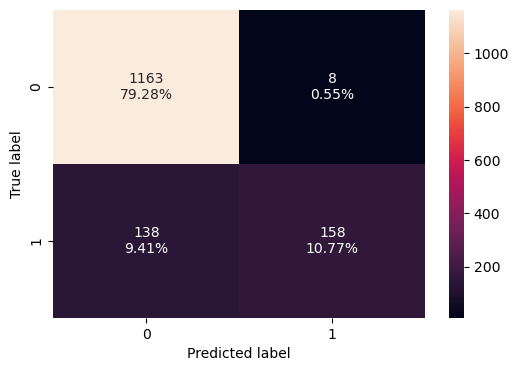

In [89]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* There's a huge difference between the training and test data sets which indicates overfitting in the model
* The test recall is lower than the decision tree, but the precision is much higher. 

### Model Improvement: Random Forest

In [90]:
# # Choose the type of classifier. 
# rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# parameters = {  
#                 'max_depth': list(np.arange(3,10,1)),
#                 'max_features': np.arange(0.6,1.1,0.1),
#                 'max_samples': np.arange(0.7,1.1,0.1),
#                 'min_samples_split': np.arange(2, 20, 5),
#                 'n_estimators': np.arange(30,160,20),
#                 'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
# }


# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(metrics.recall_score)

# # Run the grid search
# grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_tuned = grid_obj.best_estimator_

# # Fit the best algorithm to the data. 
# rf_tuned.fit(X_train, y_train)

In [91]:
# #Calculating different metrics
# rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
# print("Training performance:\n",rf_tuned_model_train_perf)
# rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
# print("Testing performance:\n",rf_tuned_model_test_perf)

# #Creating confusion matrix
# confusion_matrix_sklearn(rf_tuned, X_test, y_test)

### Model Building: Bagging

Training performance:
    Accuracy    Recall  Precision        F1
0  0.995323  0.975962   0.998361  0.987034
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.907294  0.60473    0.90404  0.724696


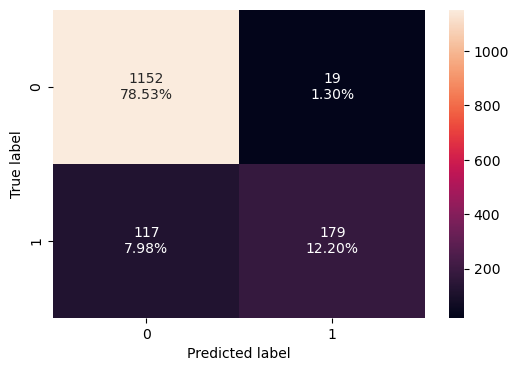

In [92]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* The training set is outperforming the test set signficantly which means there is some overfitting
* The model is doing somewhat better than the random forest

### Model Improvement: Bagging 

In [93]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.999123  0.995192        1.0  0.99759
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.922972  0.648649   0.955224  0.772636


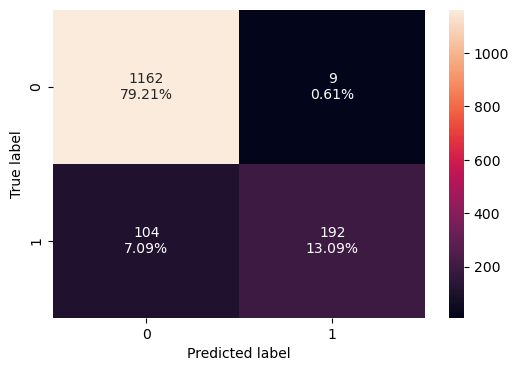

In [94]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* The model is still overfitting the data but recall has improved slightly
* The model does not appear to be good at identify customers who might potentially purchase travel packages

### Model Building: AdaBoost 

In [95]:
ada_model = AdaBoostClassifier(random_state=1)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [96]:
ada_model_perf=model_performance_classification_sklearn(ada_model, X_train, y_train)
print("Training performance \n",ada_model_perf)
ada_test_perf=model_performance_classification_sklearn(ada_model, X_test, y_test)
print("Testing performance \n",ada_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.852382  0.333333   0.700337  0.451683
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.832311  0.297297   0.698413  0.417062


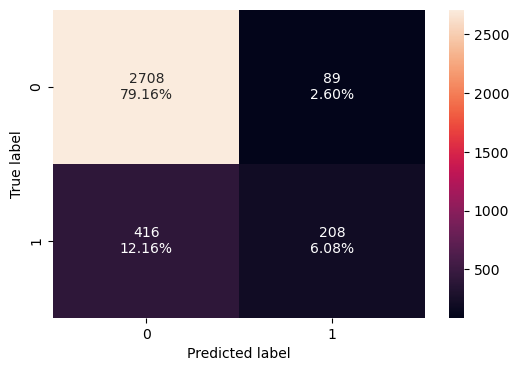

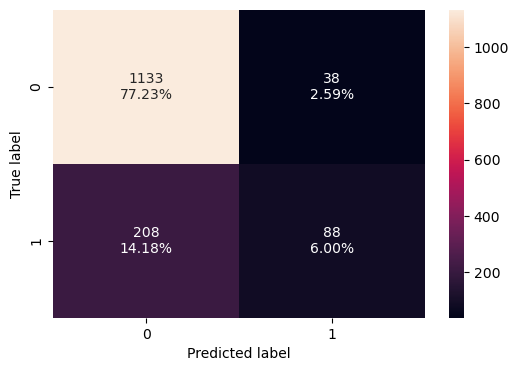

In [97]:
confusion_matrix_sklearn(ada_model, X_train, y_train)
confusion_matrix_sklearn(ada_model, X_test, y_test)

### Model Improvement: AdaBoost

In [98]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.6, n_estimators=80, random_state=1)

In [99]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9777842736042093
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.9182692307692307
Recall on test set :  0.581081081081081
Precision on training set :  0.9581939799331104
Precision on test set :  0.7543859649122807


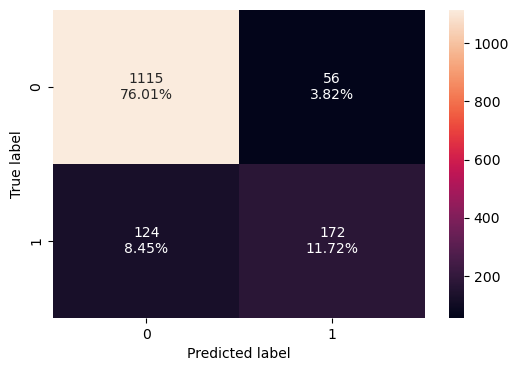

In [100]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* The model is slightly overfitting
* The model has an average recall, which means that its not good at identifying customers that will purchase travel packages

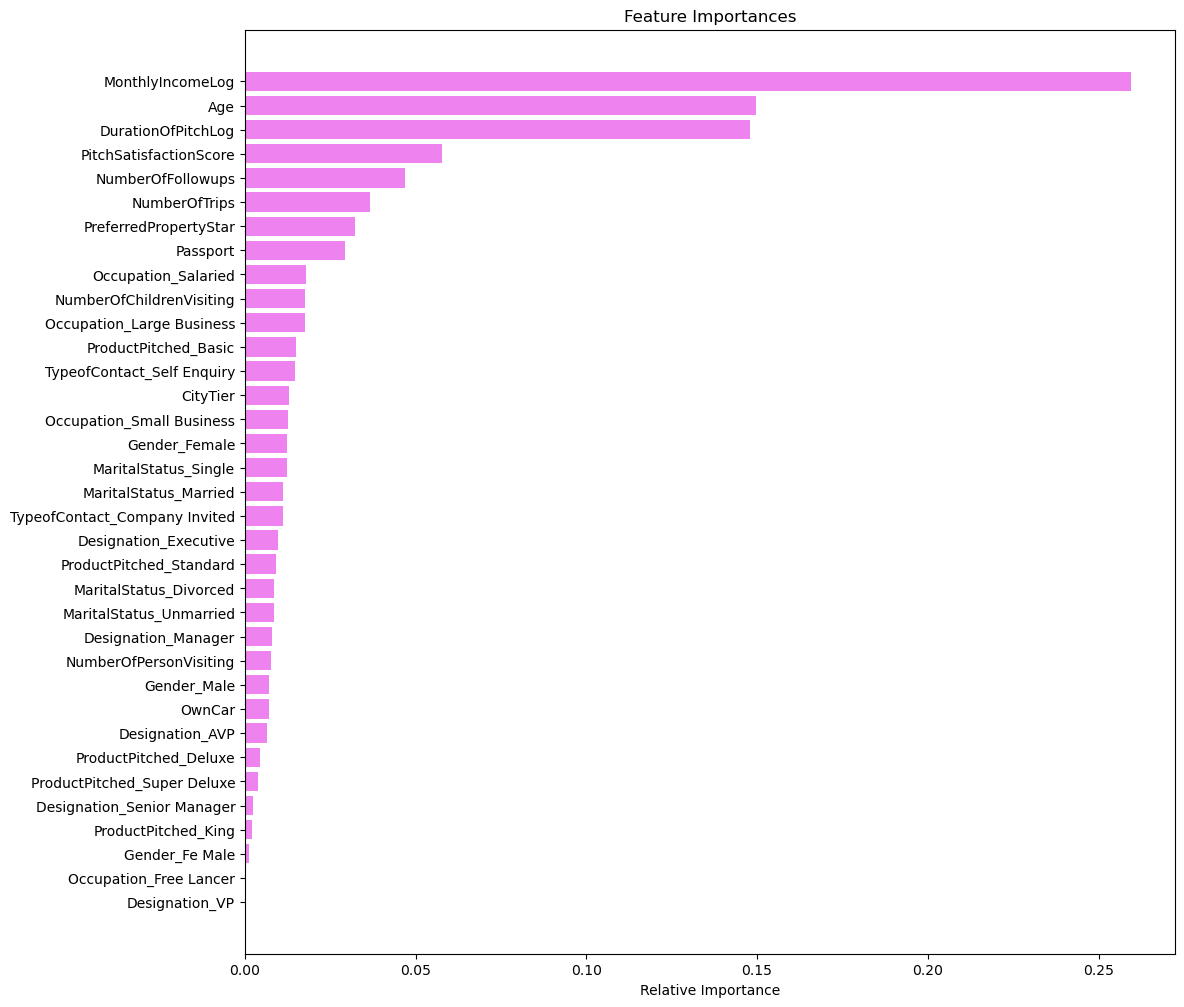

In [101]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Building: Gradient Boosting

In [102]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [103]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8883367436422098
Accuracy on test set :  0.8507157464212679
Recall on training set :  0.46474358974358976
Recall on test set :  0.3344594594594595
Precision on training set :  0.8579881656804734
Precision on test set :  0.8181818181818182


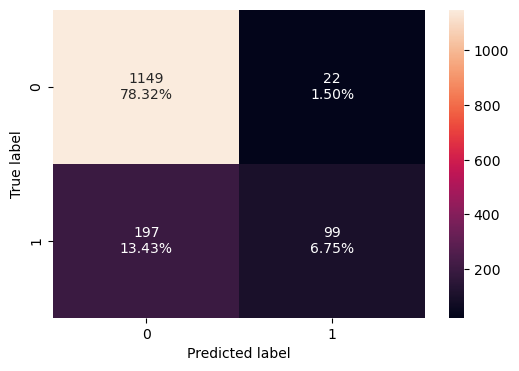

In [104]:
confusion_matrix_sklearn(gbc, X_test, y_test)

### Model Improvement: Gradient Boosting


In [105]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [106]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9310143232972815
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.6666666666666666
Recall on test set :  0.4797297297297297
Precision on training set :  0.9369369369369369
Precision on test set :  0.8452380952380952


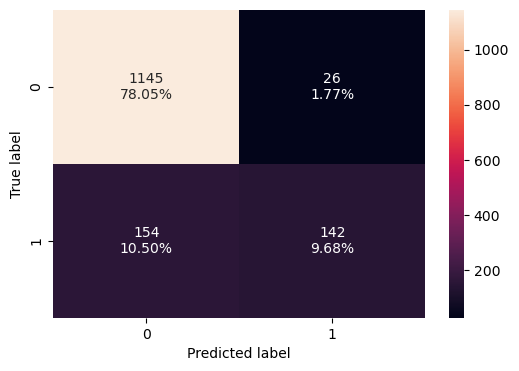

In [107]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* The tuned Gradient Boosting model improved slightly compared to the default classifier
* The model has also started to overfit in terms of recall
* The model is also better at identifying customers that are not likely to purchase travel packages compared to customers that do

### Model Building: XGBoost

**Please note XGBoost can take a significantly longer time to run, so if you have time complexity issues then you can avoid tuning XGBoost, and there will no points deducted if XG-boost is not performed**

In [108]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

In [109]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9263803680981595
Recall on training set :  0.9967948717948718
Recall on test set :  0.6756756756756757
Precision on training set :  1.0
Precision on test set :  0.9433962264150944


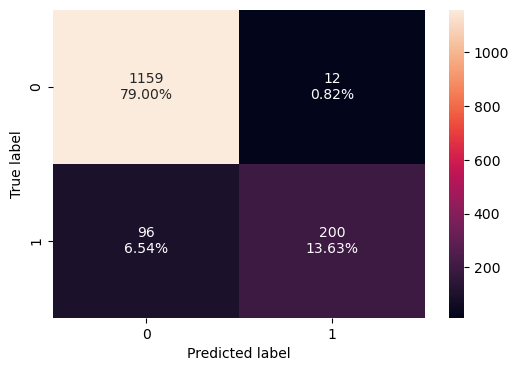

In [110]:
confusion_matrix_sklearn(xgb, X_test, y_test)

### Model Improvement: XGBoost


In [ ]:
# choose the classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,60,10),
    "subsample":[0.6,0.7,0.8],
    "learning_rate":[0.1,0.3,0.55],
    "colsample_bytree":[0.5,0.7,0.9],
    "colsample_bylevel":[0.5,0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgbc1, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned_clf = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned_clf.fit(X_train, y_train)

In [ ]:
# xgb_tuned_score=get_metrics_score(xgb_tuned_clf)

In [ ]:
# confusion_matrix_sklearn(xgb_tuned_clf, X_test, y_test)

In [ ]:
# importances = xgb_tuned.feature_importances_
# indices = np.argsort(importances)
# feature_names = list(X.columns)

# plt.figure(figsize=(12,12))
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

### Model Building: Stacking

In [119]:
# estimators=[('Decision Tree', post_model),('Bagging', bagging_estimator_tuned)]
# final_estimator=RandomForestClassifier(random_state=1)

In [120]:
# stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
# stacking_estimator.fit(X_train,y_train)

### Model Improvement: Stacking


## Model Comparison and Final Model Selection

In [117]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790997,0.823151
Recall,1.0,0.785256,0.956731
Precision,1.0,0.457516,0.508085
F1,1.0,0.578171,0.663702


In [118]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.902522,0.752556,0.768234
Recall,0.706081,0.631757,0.797297
Precision,0.788679,0.424036,0.457364
F1,0.745098,0.507463,0.581281


## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the Visit with us company?**

* The marketing team can run campaigns that specifically target customers with families to increase sales
* I would also recommend targeting customers who have passports because those are the ones most likely to purchase travel packages
* Although married customers had a larger sample size than single customers, single customers appear to be more likely to travel
* 

___